<a href="https://colab.research.google.com/github/jccrews256/ST-554-Project1-Template/blob/main/Task1/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 554 Project 1, Task 1
*By Cass Crews*

*Reviewed by Joy Zhou and Trevor Lillywhite*


## Introduction

To be added.

### Importing and Cleaning Data

In [33]:
# Installing UCI machine learning repository module
!pip install ucimlrepo

# Importing key modules
import pandas as pd
import numpy as np
import math
import ucimlrepo as uci
import matplotlib.pyplot as plt
from math import sqrt

In [5]:
# Reading in the air quality data
air_quality = uci.fetch_ucirepo(id=360)

# Capturing data only
air_quality_df = air_quality.data.features

air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
air_quality_df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [7]:
# Creating more informative column names
air_quality_df = air_quality_df.rename(columns = {"CO(GT)": "CO_true",
                                 "PT08.S1(CO)": "CO_sensor",
                                 "NMHC(GT)": "NMHC_true",
                                 "C6H6(GT)": "C6H6_true",
                                 "PT08.S2(NMHC)": "NMHC_sensor",
                                 "NOx(GT)": "NOx_true",
                                 "PT08.S3(NOx)": "NOx_sensor",
                                 "NO2(GT)": "NO2_true",
                                 "PT08.S4(NO2)": "NO2_sensor",
                                 "PT08.S5(O3)": "O3_sensor",
                                 "T": "Temp",
                                 "RH": "Rel_Humid",
                                 "AH": "Abs_Humid"})

air_quality_df.columns

Index(['Date', 'Time', 'CO_true', 'CO_sensor', 'NMHC_true', 'C6H6_true',
       'NMHC_sensor', 'NOx_true', 'NOx_sensor', 'NO2_true', 'NO2_sensor',
       'O3_sensor', 'Temp', 'Rel_Humid', 'Abs_Humid'],
      dtype='object')

Let's extract some information on the data frame, such as the total number of observations, each column's data type, and the number of null values by column.

In [8]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   CO_true      9357 non-null   float64
 3   CO_sensor    9357 non-null   int64  
 4   NMHC_true    9357 non-null   int64  
 5   C6H6_true    9357 non-null   float64
 6   NMHC_sensor  9357 non-null   int64  
 7   NOx_true     9357 non-null   int64  
 8   NOx_sensor   9357 non-null   int64  
 9   NO2_true     9357 non-null   int64  
 10  NO2_sensor   9357 non-null   int64  
 11  O3_sensor    9357 non-null   int64  
 12  Temp         9357 non-null   float64
 13  Rel_Humid    9357 non-null   float64
 14  Abs_Humid    9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


Note that Python does not find any null values, as the non-null counts for each column are equal to the total number of observations. However, the data documentation indicate missing values are denoted by -200 and, therefore, would not be considered null values by Python. We clearly see this issue when we generate some basic summary statistics for the numeric variables using the `describe()` method.

In [9]:
air_quality_df.describe()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,Temp,Rel_Humid,Abs_Humid
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


When looking at the `min` for each column, we see that all numeric variables have some observations that are missing values. In fact, when looking at `NMHC_true`, we see that more than 75% of observations are missing the true NMHC level.

Let's extract the total number of missing values for each numeric variable so we have a complete understanding of missing value rates.

In [10]:
# Counting missing values
for v in air_quality_df:
    print(v, " Missing Value Count: ", (air_quality_df[v] == -200).sum(),
          " (", (100*(air_quality_df[v] == -200).sum()/(len(air_quality_df))).round(2),
          "%)", sep = "")

Date Missing Value Count: 0 (0.0%)
Time Missing Value Count: 0 (0.0%)
CO_true Missing Value Count: 1683 (17.99%)
CO_sensor Missing Value Count: 366 (3.91%)
NMHC_true Missing Value Count: 8443 (90.23%)
C6H6_true Missing Value Count: 366 (3.91%)
NMHC_sensor Missing Value Count: 366 (3.91%)
NOx_true Missing Value Count: 1639 (17.52%)
NOx_sensor Missing Value Count: 366 (3.91%)
NO2_true Missing Value Count: 1642 (17.55%)
NO2_sensor Missing Value Count: 366 (3.91%)
O3_sensor Missing Value Count: 366 (3.91%)
Temp Missing Value Count: 366 (3.91%)
Rel_Humid Missing Value Count: 366 (3.91%)
Abs_Humid Missing Value Count: 366 (3.91%)


It seems missing values are much more common for the true concentration readings. Additionally, there are 366 missing values for each sensor-based reading, as well as the weather conditions variables. These were likely times when all experiment-related systems were down.

To provide one final validation step for the numeric variables, let's convert all missing values to `NaN` values and regenerate the basic summary statistics.

In [11]:
# Converting missing values for numeric variables to NaN
for v in air_quality_df.loc[ : , "CO_true":"Abs_Humid"]:
    air_quality_df.loc[(air_quality_df[v] == -200), v] = np.nan

# Generating summary stats after converting missing values
air_quality_df.describe()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,Temp,Rel_Humid,Abs_Humid
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


These updated summary statistics give a much better picture of the distribution for each numeric variable. Overall, there are no major red flags, such as negative values for variables that should only have positive values. One thing to note is that the true concentrations for each chemical compound are on a different scale from their corresponding sensor measurements (when available). This is because the sensors are generating nominal measurements based on changes in electrical resistance of metal oxides within the sensors, rather than directly reporting chemical concentration estimates.

As we have date and time stamps, let's create a true datetime column. This will make it easier to document the time range we are working with. Note that `pd.to_datetime()` will give an error if we feed it non-conforming date-time string, so the function provides a natural data quality check.

In [12]:
# Concatenating Date and Time
air_quality_df["date_time"] = air_quality_df.Date + " " + air_quality_df.Time

# Converting date_time to a true datetime type
air_quality_df["date_time"] = pd.to_datetime(air_quality_df.date_time)

# Printing first few rows of updated data frame
air_quality_df.head()

,Date,Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,Temp,Rel_Humid,Abs_Humid,date_time
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


Now that we have a date-time stamp, we can check the earliest and latest date-times to ensure there are no date or time input issues we need to resolve.

In [13]:
# Extracting min and max date-time
print("Earliest date-time stamp:", air_quality_df.date_time.min())
print("Latest date-time stamp:", air_quality_df.date_time.max())

Earliest date-time stamp: 2004-03-10 18:00:00
Latest date-time stamp: 2005-04-04 14:00:00


It seems we have time stamps spanning roughly 13 months from March 2004 to April 2005.

As one last check of the `Date` and `Time` information, let's confirm the 9357 date-time values are unique; given that these are time series data, there should be no duplicates.

In [14]:
# Summing unique values to count unique observations
print("Unique date-time stamps:", air_quality_df.date_time.nunique())

Unique date-time stamps: 9357


The number of unique date-time stamps is equal to the total number of observations, so it seems there are no issues with the date-time values for any observation.

Now that the general data validation and cleaning has been completed, the final step before creating the gradient descent algorithms is to drop any observations with missing values for `CO_sensor` and/or `C6H6_true`, the two variables we will utilize in creating the algorithms.

In [26]:
# Subsetting to only observations without missing values for CO_true and C6H6_true
air_quality_df = air_quality_df[["CO_sensor", "C6H6_true"]].dropna()

print("Observations without missing values for either CO_sensor or C6H6_true:",
      air_quality_df.shape[0])

Observations without missing values for either CO_sensor or C6H6_true: 8991


This leaves us with 8991 observations to work with, which should be sufficient to build a model relating C6H6 concentration to CO sensor values. Note that this is the exact number of observations we obtained for each variable when we converting missing codes to `NaN`. Thus, CO sensor readings were recorded each time benzene concentration was measured, and vice versa.

### Grid Search Algorithm

The first type of algorithm we will explore to identify the optimal parameter values is a basic grid search algorithm. That is, we will predefine a set of potential values for each parameter we want to estimate, and we will calculate the training root mean square error (RMSE) for each of these candidate values to identify the value that minimizes training RMSE.

#### Predicting Future C6H6 Concentration using only Observed Concentration

The first scenario we will consider is one in which we identify a single constant, $c$, that is our best guess at a future C6H6 concentration using only the observed levels of C6H6 concentration. That is, we will identify $c$ such that we minimize the training RMSE:

$$\min_{c}\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - c)^2},$$

where $y_i,...,y_n$ are the $n=8991$ C6H6 concentration values in the dataset.

The first step is to determine the values of $c$ to test. It seems reasonable that the optimal value of $c$ will be near the center of the distribution of C6H6 concentrations, so we will consider 10,000 equally spaced values between the first quartile and third quartile of our empirical distribution.


In [83]:
# Capturing first and third quartiles of C6H6_true
C6H6_quartiles = air_quality_df.C6H6_true.quantile(q = [0.25, 0.75])

# Generating grid for c ranging from first quartile to third quartile
c_grid = np.linspace(C6H6_quartiles[0.25], C6H6_quartiles[0.75], 10000)

# Printing the first and final five grid values
print("First five grid values:", c_grid[:5])
print("Final five grid values:", c_grid[-5:])
print("Grid length:", len(c_grid))

First five grid values: [4.4        4.4009601  4.40192019 4.40288029 4.40384038]
Final five grid values: [13.99615962 13.99711971 13.99807981 13.9990399  14.        ]
Grid length: 10000


In printing the first and final five values, we see that `np.linspace()` worked as intended; the grid is comprised of 1,000 equally spaced values ranging from 4.4 to 14.0. Now that we have a grid of values, we need to build a function that will take in a `pandas` series of data and a value for $c$ and return the resultant RMSE value.

In [79]:
# Constructing RMSE calculator function
def rmse_calculator(y, c):
    sq_errors = (y - c)**2
    rmse = sqrt(1/len(sq_errors)*sq_errors.sum())
    return rmse

We can use a list comprehension with this function to extract the RMSE for each candidate $c$ value in our grid. We'll plot the RMSE values against $c$ to confirm our function worked and also confirm our optimization problem is convex over the grid with a minimum within its range.

Text(0, 0.5, 'RMSE')

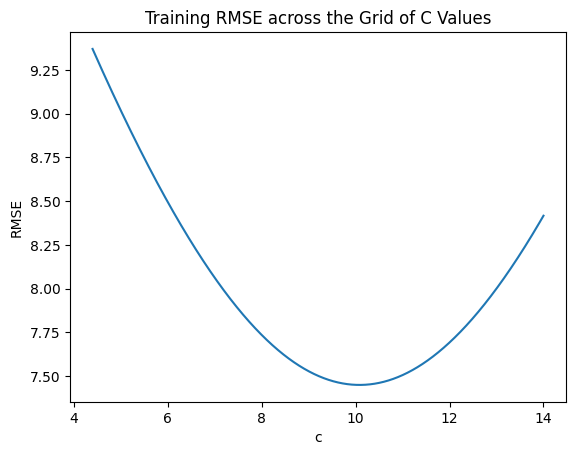

In [84]:
# Capturing RMSE for each value in c_grid
rmse_grid = [rmse_calculator(air_quality_df.C6H6_true, c) for c in c_grid]

# Capturing c and rmse values in a dataframe
rmse_df = pd.DataFrame(zip(c_grid, rmse_grid), columns = ["c", "rmse"],
                       index = c_grid)

# Plotting rmse against c
rmse_df.rmse.plot()
plt.title("Training RMSE across the Grid of C Values")
plt.xlabel("c")
plt.ylabel("RMSE")

The RMSE values have a nice, convex shape across the sequence of $c$ values, with a minimum near $c=10$. Let's extract the specific RMSE-minimizing value of $c$.

In [85]:
# Printing minimum RMSE and corresponding c
print("Minimum RMSE:",
      rmse_df.loc[rmse_df.rmse == rmse_df.rmse.min()]["rmse"].values)
print("Corresponding c value:",
      rmse_df.loc[rmse_df.rmse == rmse_df.rmse.min()]["c"].values)

Minimum RMSE: [7.4494054]
Corresponding c value: [10.08280828]


We achieve a minimum RMSE of 7.449 with a $c$ value of 10.083. This implies our best singular guess at a future benzene concentration is 10.083! Given that calculus tells us the RMSE-minimizing value will be the sample mean, this shouldn't come as a surprise: the sample mean concentration is also 10.083.

As this dataset reports true concentrations for multiple compounds, it would be convenient to wrap this entire optimization process in a single function. This function would take in a `pandas` series of sample data for the variable of interest, `y`. It would do the following:

* Use sample quartiles for `y` to bound reasonable values for $c$
* Generate 1,000 candidate $c$ values
* Generate RMSE values for each candidate $c$
* Return a `pandas` series containing the minimum RMSE and corresponding $c$ value

 Let's create that function now.

In [76]:
# Constructing function that generates an RMSE-minimizing constant prediction
# the input series
def predictor_constant(y):
    # Capturing first and third quartiles of input series
    y_quartiles = y.quantile(q = [0.25, 0.75])

    # Generating grid for c ranging from first quartile to third quartile
    c_grid = np.linspace(y_quartiles[0.25], y_quartiles[0.75], 10000)

    # Capturing RMSE for each value in c_grid
    rmse_grid = [rmse_calculator(y, c) for c in c_grid]

    # Capturing c and rmse values in a dataframe
    rmse_df = pd.DataFrame(zip(c_grid, rmse_grid), columns = ["c", "rmse"],
                           index = c_grid)

    # Capturing minimum rmse and corresponding c in a pandas series
    results = rmse_df.loc[rmse_df.rmse == rmse_df.rmse.min()].squeeze(axis = 0)
    results.name = "results" # Updating series name for cleanliness

    # Returning the pandas series
    return results

We can now apply our simple prediction-generating process to any vector of data with a single call to `predictor_constant`. To ensure the function works as intended, let's try to recreate our results for the benzene data.

In [77]:
# Generating the constant benzene prediction using predictor_constant
predictor_constant(air_quality_df.C6H6_true)

,results
c,10.082808
rmse,7.449405


These are identical to the results we previously obtained!

In the next subsection, we will use `CO_sensor`, the carbon monoxide sensor readings, to aid in predicting benzene concentration. Before doing so, let's test `predictor_constant` using `CO_sensor` to ensure it truly does generalize to any `pandas` series.

In [78]:
# Generating constant CO_sensor prediction
predictor_constant(air_quality_df.CO_sensor)

,results
c,1099.833483
rmse,217.067965


Again, it's no surprise that the optimal value of $c$ is 1099.833, the sample mean carbon monoxide sensor reading. It's also not a surprise that the optimal RMSE is almost identical to the sample standard deviation ($s$) of `CO_sensor` as,
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - c_{opt})^2} \approx \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(y_i - \bar{y})^2} = s,$$
where $\bar{y}$ denotes the sample mean of $y$ and $c_{opt}$ denotes the optimal value of $c$.